In [10]:
from pyiron_workflow import Workflow
from pyiron_atomistics import Project
from typing import Optional
import pandas as pd

In [11]:
pr = Project('fitting')

In [19]:
df0 = pr.load(23314903).to_pandas()

In [31]:
df0.to_pickle(path = 'dataset.pckl.gzip',compression = 'gzip')

In [32]:
pd.read_pickle("dataset.pckl.gzip",compression='gzip')

,name,atoms,energy,forces,number_of_atoms
0,Al_fcc_opt_opt,"[Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('Al', [0.0, 2.019983601551115, 2.019983601551115], index=1), Atom('Al', [2.019983601551115, 0.0, 2.019983601551115], index=2), Atom('Al', [2.01998360155...",-13.931005,"[[-0.0, 0.0, 0.0], [-0.0, -0.0, 0.0], [0.0, 0.0, -0.0], [0.0, -0.0, -0.0]]",4
1,Al_fcc_murn_strain_0_9400000000000001,"[Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('Al', [0.0, 1.978747875912702, 1.978747875912702], index=1), Atom('Al', [1.978747875912702, 0.0, 1.978747875912702], index=2), Atom('Al', [1.97874787591...",-13.866105,"[[-0.0, 0.0, -0.0], [-0.0, -0.0, -0.0], [0.0, 0.0, 0.0], [-0.0, 0.0, 0.0]]",4
2,Al_fcc_murn_strain_0_9600000000000001,"[Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('Al', [0.0, 1.9926831792379638, 1.9926831792379638], index=1), Atom('Al', [1.9926831792379638, 0.0, 1.9926831792379638], index=2), Atom('Al', [1.9926831...",-13.903259,"[[-0.0, -0.0, 0.0], [-0.0, 0.0, -0.0], [0.0, -0.0, -0.0], [0.0, 0.0, 0.0]]",4
3,Al_fcc_murn_strain_0_9800000000000001,"[Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('Al', [0.0, 2.006426256137258, 2.006426256137258], index=1), Atom('Al', [2.006426256137258, 0.0, 2.006426256137258], index=2), Atom('Al', [2.00642625613...",-13.924316,"[[0.0, -0.0, 0.0], [0.0, 0.0, -0.0], [-0.0, 0.0, 0.0], [-0.0, 0.0, -0.0]]",4
4,Al_fcc_murn_strain_1_0,"[Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('Al', [0.0, 2.019983601551115, 2.019983601551115], index=1), Atom('Al', [2.019983601551115, 0.0, 2.019983601551115], index=2), Atom('Al', [2.01998360155...",-13.930995,"[[-0.0, 0.0, 0.0], [-0.0, 0.0, -0.0], [-0.0, -0.0, 0.0], [0.0, -0.0, 0.0]]",4
...,...,...,...,...,...
97,structure_257,"[Atom('Al', [0.0, 0.0, 1.94957019], index=0), Atom('Al', [1.461934405, 1.461934405, 0.0], index=1)]",-6.952301,"[[-0.0, 0.0, 0.0], [0.0, -0.0, 0.0]]",2
98,structure_258,"[Atom('Al', [0.0, 0.0, 1.94957019], index=0), Atom('Al', [1.461934405, 1.461934405, 0.0], index=1)]",-6.952301,"[[-0.0, -0.0, 0.0], [0.0, 0.0, 0.0]]",2
99,structure_1054,"[Atom('Al', [0.0, 0.0, 0.0], index=0), Atom('Al', [0.0, 2.035463765, 2.035463765], index=1), Atom('Al', [2.035463765, 0.0, 2.035463765], index=2), Atom('Al', [2.035463765, 2.035463765, 0.0], index...",-13.922785,"[[0.0, -0.0, -0.0], [-0.0, 0.0, 0.0], [0.0, 0.0, -0.0], [0.0, -0.0, 0.0]]",4
100,structure_2856,"[Atom('Al', [0.8356434549768986, 1.4473769511404362, 3.199010673651957], index=0), Atom('Al', [1.6712869350231012, -1.1140435907108781e-08, 7.796997313651957], index=1), Atom('Al', [0.0, 0.0, 5.43...",-13.843424,"[[-0.0, -0.0, -0.34043287], [0.0, -0.0, -0.34043287], [-0.0, -0.0, 0.34043287], [-0.0, 0.0, 0.34043287]]",4


In [8]:
# df0=pd.read_pickle("../Haitham-Jupyter-notebooks/AuCu8_merged.pckl.gzip")

In [ ]:
# split 95% train, 5% test
df_train=df0.sample(frac=0.95, random_state=42)
df_test = df0.loc[(i for i in df0.index if i not in df_train.index)]

In [33]:
from pyace.linearacefit import LinearACEFit, LinearACEDataset
from pyace import create_multispecies_basis_config

In [54]:
potential_config = {
  "deltaSplineBins": 0.001,
  "elements": ['Cu'],

  "embeddings": {
    "ALL": {
      "npot": 'FinnisSinclairShiftedScaled',
      "fs_parameters": [ 1, 1],
      "ndensity": 1,
    },
  },

  "bonds": {
    "ALL": {
      "radbase": "SBessel",
      "radparameters": [ 5.25 ],
      "rcut": 6,
      "dcut": 0.01,
    }
  },

  "functions": {
    # "number_of_functions_per_element": 1000,
    "ALL": {
        "nradmax_by_orders": [ 8, 8, 4, 3,2],
        "lmax_by_orders"   : [ 0, 4, 3, 2,1] }
  }
}

In [95]:
@Workflow.wrap.as_function_node()
def set_embedding_dict(npot: Optional[str] = 'FinnisSinclairShiftedScaled', parameters: list[int] = [1, 1], ndensity: int= 1):
    embedding_dict = {    "ALL": {
      "npot": npot,
      "fs_parameters": parameters,
      "ndensity": ndensity,
    },
                     }
    return embedding_dict

In [96]:
@Workflow.wrap.as_function_node()
def set_bonds_dict(radbase: str = "SBessel", radparameter : float = 5.25, rcut : int = 7, dcut : float = 0.01):
    bonds_dict = {    "ALL": {
      "radbase": radbase,
      "radparameters": [radparameter],
      "rcut": rcut,
      "dcut": dcut,
    },
    }
    return bonds_dict

In [97]:
@Workflow.wrap.as_function_node()
def set_functions_dict(nrad_max: list[int], l_max: list[int], number_of_functions_per_element: Optional[int] = 0):
    functions_dict = {
        "ALL": {
            "nradmax_by_orders": nrad_max,
            "lmax_by_orders": l_max
        }
    }
    if number_of_functions_per_element:
        functions_dict["number_of_functions_per_element"] = number_of_functions_per_element

    return functions_dict

In [98]:
@Workflow.wrap.as_function_node()
def create_potential_config_dict(elements: list[str], embedding_dict: dict, bonds_dict: dict, functions_dict: dict):
    '''
    returns the potential config dictionary
    '''
    
    potential_config ={
      "deltaSplineBins": 0.001,
      "elements": elements,
    
      "embeddings": embedding_dict,
    
      "bonds": bonds_dict,

      "functions": functions_dict
    }

    return potential_config    

In [99]:
@Workflow.wrap.as_function_node()
def create_empty_basis_config(potential_config):
    '''
    returns an empty basis config
    '''
    from pyace import create_multispecies_basis_config
    bconf = create_multispecies_basis_config(potential_config)
    return bconf

In [100]:
@Workflow.wrap.as_macro_node("empty_basis_config")
def BasisMacro(wf, elements, nrad_max, l_max, number_of_functions_per_element):    
    wf.step1 = set_embedding_dict()
    wf.step2 = set_bonds_dict()
    wf.step3 = set_functions_dict(nrad_max, l_max, number_of_functions_per_element)
    wf.step4 = create_potential_config_dict(elements, wf.step1.outputs.embedding_dict, wf.step2.outputs.bonds_dict, wf.step3.outputs.functions_dict)
    wf.step5 = create_empty_basis_config(wf.step4.outputs.potential_config)
    return wf.step5.outputs.bconf

In [101]:
macro = BasisMacro()

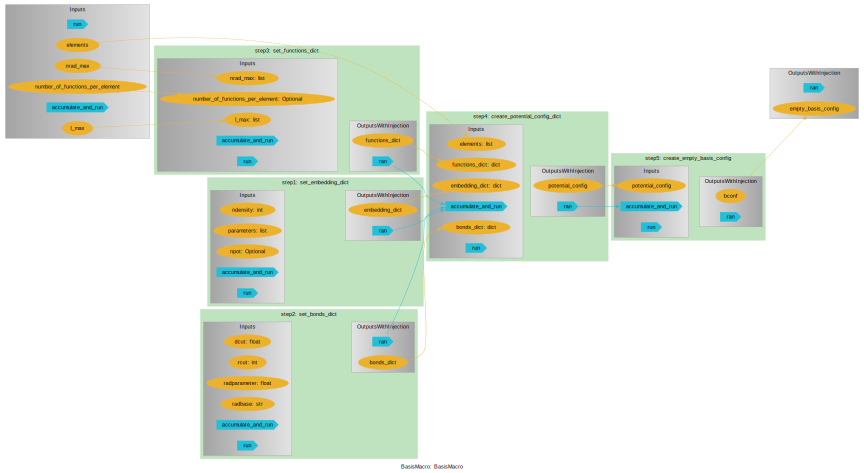

In [139]:
macro.draw(size=(12,12))

In [146]:
bconf = macro(elements = ['Cu'], nrad_max = [15,15,4,2], l_max = [0,1,1,1], number_of_functions_per_element = 2000)

In [147]:
bconf['empty_basis_config'].total_number_of_functions

335

In [122]:
# Create empty bbasis configuration
bconf = create_multispecies_basis_config(potential_config = {
  "deltaSplineBins": 0.001,
  "elements": ['Cu'],

  "embeddings": {
    "ALL": {
      "npot": 'FinnisSinclairShiftedScaled',
      "fs_parameters": [ 1, 1],
      "ndensity": 1,
    },
  },

  "bonds": {
    "ALL": {
      "radbase": "SBessel",
      "radparameters": [ 5.25 ],
      "rcut": 6,
      "dcut": 0.01,
    }
  },

  "functions": {
    # "number_of_functions_per_element": 1000,
    "ALL": {
        "nradmax_by_orders": [ 8, 8, 4, 3,2],
        "lmax_by_orders"   : [ 0, 4, 3, 2,1] }
  }
}
)